In [1]:
#Bu çalışmada veri seti üzerinde ElasticNet regresyon modelini deneyeceğiz.
#ElasticNet regresyonunun amacı Ridge ve Lassa'da olduğu gibi hata kareler toplamını minimize etmektir.
#Bu model Ridge ve Lasso regresyon modellerinin birleşimidir.
#Ridge tarzı cezalandırma ve lasso tarzı değişken silme yöntemini bir arada yapıyor.
#Doğrusal regresyon modelleri arasında en gelişmiş regresyon modelidir.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn import model_selection

In [3]:
#Veri ön işleme aşamalarını yapalım.
data=pd.read_csv("Hitters.csv")
df=data.copy()
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
x=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
x=pd.concat([x,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=66)

In [4]:
#alpha parametresi formüldeki lambdalardır.Öntanımlı olarak 1 girilmiştir.
#l1_ratio argümanı hangi cezayı kullanacağını belirler.#0 ise L2, 1 ise L1 cezalandırması yapar.
#l1_ratio nun öntanımlı değeri 0.5 dir. yani iki cezayı da kullanır.
enet=ElasticNet().fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9494631.660314092, tolerance: 4275.528283492919
  positive)


In [5]:
#Modelin sabiti.
enet.intercept_

198.20754421255242

In [6]:
#Modelin oluşturduğu denklemdeki değişkenlerin kat sayısı.
enet.coef_

array([-2.07254284e+00,  6.79187855e+00,  3.73503098e-01, -1.95551987e+00,
        8.56426776e-01,  4.94718144e+00,  2.00820306e+00, -5.05230656e-01,
        1.48082232e+00,  1.76601040e+00,  1.30897133e+00, -2.57753742e-02,
       -6.22795402e-01,  3.49617349e-01,  3.58362723e-01, -1.19789039e+00,
        1.12998965e+01, -2.68202920e+01,  3.76620084e+00])

In [7]:
y_pred=enet.predict(x_test)

In [8]:
"Test hatası: ",np.sqrt(mean_squared_error(y_test,y_pred))

('Test hatası: ', 321.4815799977146)

In [9]:
r2_score(y_test,y_pred)

0.31587380000060794

In [10]:
#ElasticNet modelinin de kendi tuning fonksiyonu vardır.
from sklearn.linear_model import ElasticNetCV

In [11]:
#10 katlı cross validation la tuning işlemi yapalım.
enet_cv=ElasticNetCV(cv=10,random_state=66).fit(x_train,y_train)

In [12]:
#Model optimum lambda değerini buldu.
enet_cv.alpha_

1042.2612769794118

In [13]:
#Optimum lambda değeriyle final modelini kuralım.
enet_tuned=ElasticNet(alpha=enet_cv.alpha_).fit(x_train,y_train)

In [14]:
y_pred_tuned=enet_tuned.predict(x_test)

In [15]:
"Test hatası: ",np.sqrt(mean_squared_error(y_test,y_pred_tuned))

('Test hatası: ', 326.69727873071474)

In [16]:
y_pred_tuned=pd.Series(y_pred_tuned,index=y_test.index)

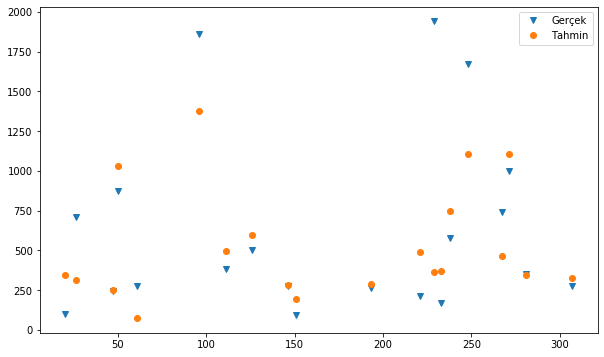

In [17]:
plt.figure(figsize=(10,6))
plt.plot(y_test[:20],"v")
plt.plot(y_pred_tuned[:20],"o")
plt.legend(["Gerçek","Tahmin"]);

# Sonuç

Aynı veri seti üzerinde birkaç doğrusal regresyon modeli denedik.
Tune edilmiş modellerin hata değerlerine bakarak bu veri seti için kullandığımız modeller
arasından en uygun modelin ElasticNet(ENet) regresyson modeli olduğunu gördük.